In [728]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [729]:
# Leitura Arquivo
caminho_arquivo = "/content/drive/MyDrive/aaaDesafioSenior/sms_senior.csv"
caminho_arquivo
pd_dados = pd.read_csv(caminho_arquivo, sep=",", encoding="ISO-8859-1")

In [730]:
pd_dados.columns

Index(['Full_Text', 'got', 'great', 'wat', 'free', 'text', 'txt', 'win',
       'already', 'dun',
       ...
       'number', 'wish', 'leave', 'thing', 'many', 'wan', 'Common_Word_Count',
       'Word_Count', 'Date', 'IsSpam'],
      dtype='object', length=154)

# Primeira Etapa

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras,
nuvem de palavras, etc).

In [731]:
palavras_texto = "".join(p for p in pd_dados["Full_Text"])

In [732]:
print(len(np.array(pd_dados["Full_Text"])))
print(len(palavras_texto))

5574
448443


In [733]:
wordcloud = WordCloud(background_color='black', width=1500,                            
                      height=700).generate(palavras_texto)

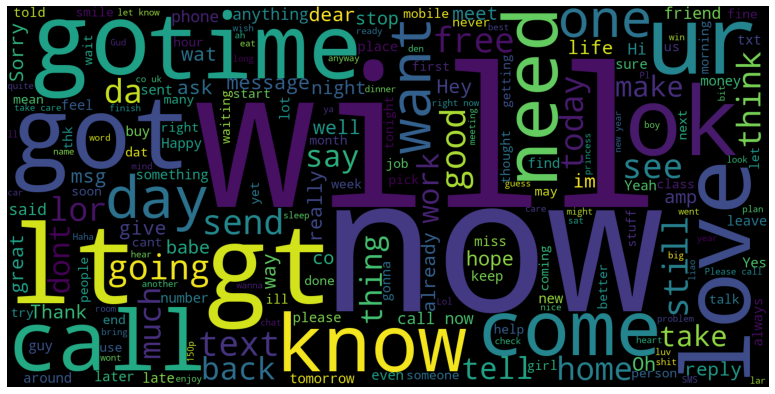

In [734]:
fig, ax = plt.subplots(figsize=(15,7))            
ax.imshow(cloud)
ax.set_axis_off()
plt.imshow(cloud)

2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;

In [735]:
print("Total:"+ str(len(pd_dados["Full_Text"])))
mensagens_comuns = pd_dados.loc[pd_dados["IsSpam"] == "no"]
mensagens_comuns["Date"] = pd.to_datetime(mensagens_comuns["Date"])
print("Total Comuns:"+ str(len(mensagens_comuns)))
mensagens_spam = pd_dados.loc[pd_dados["IsSpam"] == "yes"]
mensagens_spam["Date"] = pd.to_datetime(mensagens_spam["Date"])
print("Total Spams:"+ str(len(mensagens_spam)))


Total:5574
Total Comuns:4827
Total Spams:747


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


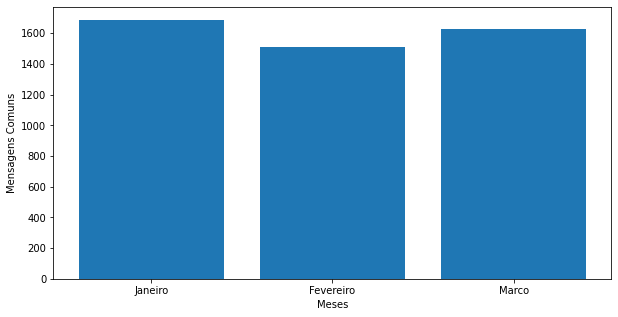

In [736]:
x = mensagens_comuns["Date"].groupby([mensagens_comuns.Date.dt.month]).count().keys().values
y = mensagens_comuns["Date"].groupby([mensagens_comuns.Date.dt.month]).count().values

meses = ["Janeiro", "Fevereiro", "Marco", "Abril", "Maio", "Junho", "Julho", "Agosto"
        , "Setembro", "Outubro", "Novembro", "Dezembro"]

fig = plt.figure(figsize = (10, 5)) 
  
plt.bar([meses[i-1] for i in x], y) 
  
plt.xlabel("Meses") 
plt.ylabel("Mensagens Comuns") 
plt.show() 

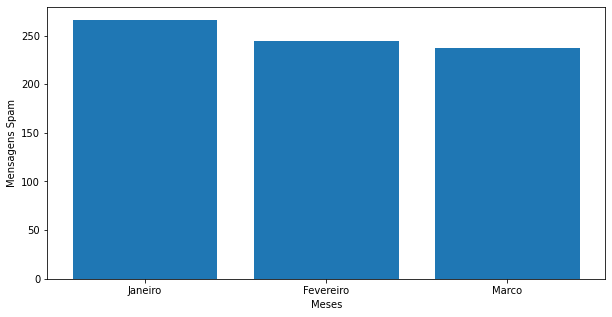

In [737]:
x = mensagens_spam["Date"].groupby([mensagens_spam.Date.dt.month]).count().keys().values
y = mensagens_spam["Date"].groupby([mensagens_spam.Date.dt.month]).count().values

meses = ["Janeiro", "Fevereiro", "Marco", "Abril", "Maio", "Junho", "Julho", "Agosto"
        , "Setembro", "Outubro", "Novembro", "Dezembro"]

fig = plt.figure(figsize = (10, 5)) 
  
plt.bar([meses[i-1] for i in x], y) 
  
plt.xlabel("Meses") 
plt.ylabel("Mensagens Spam") 
plt.show() 

3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade
total de palavras (Word_Count) para cada mês;

In [738]:
# Mensagens Comuns
mensagens_comuns.groupby([mensagens_comuns.Date.dt.month])["Word_Count"].agg(["min", "max", "mean", "median", "std", "var"])

,min,max,mean,median,std,var
Date,,,,,,
1,2,190,14.867220,11,12.728394,162.012015
2,2,100,14.562831,11,10.966891,120.272688
3,2,115,14.917076,11,11.532744,133.004183


In [739]:
# Mensagens Spam
mensagens_spam.groupby([mensagens_spam.Date.dt.month])["Word_Count"].agg(["min", "max", "mean", "median", "std", "var"])

,min,max,mean,median,std,var
Date,,,,,,
1,3,36,25.657895,27,5.456472,29.773088
2,5,36,25.114754,26,6.042642,36.513526
3,2,39,25.683544,27,6.315593,39.886720


4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [740]:
mes_dia = mensagens_comuns["Date"].groupby([mensagens_comuns.Date.dt.month, mensagens_comuns.Date.dt.day]).count().sort_values(ascending=False).head(3).keys().values
valores = mensagens_comuns["Date"].groupby([mensagens_comuns.Date.dt.month, mensagens_comuns.Date.dt.day]).count().sort_values(ascending=False).head(3).values

mes_dia_valor = [np.append(np.array([meses[valor[0]-1], valor[1]]), valores[i]) for i, valor in enumerate(mes_dia)]

pd.DataFrame(mes_dia_valor, columns=["Mes", "Dia", "Qtd"])

,Mes,Dia,Qtd
0,Fevereiro,13,72
1,Janeiro,1,69
2,Marco,8,69


In [741]:
mes_dia = mensagens_spam["Date"].groupby([mensagens_spam.Date.dt.month, mensagens_spam.Date.dt.day]).count().sort_values(ascending=False).head(3).keys().values
valores = mensagens_spam["Date"].groupby([mensagens_spam.Date.dt.month, mensagens_spam.Date.dt.day]).count().sort_values(ascending=False).head(3).values

mes_dia_valor = [np.append(np.array([meses[valor[0]-1], valor[1]]), valores[i]) for i, valor in enumerate(mes_dia)]

pd.DataFrame(mes_dia_valor, columns=["Mes", "Dia", "Qtd"])

,Mes,Dia,Qtd
0,Fevereiro,18,14
1,Marco,10,14
2,Janeiro,12,13


# Segunda Etapa

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
pd_dados.describe()

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,...,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,...,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.00000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,0.010944,0.052386,0.023681,0.027269,0.019914,0.043775,0.085935,0.034266,0.027628,0.011302,0.010405,0.010585,0.104234,0.020273,0.010405,0.016505,0.024937,0.010405,0.029064,0.013455,0.010585,0.025296,0.010764,0.034625,0.013276,0.025834,0.011661,0.020811,0.013097,0.010585,...,0.027808,0.030678,0.010047,0.020632,0.010764,0.008970,0.010585,0.011661,0.009508,0.008970,0.009688,0.020273,0.014173,0.008970,0.013635,0.009508,0.012199,0.013994,0.010944,0.012199,0.010226,0.011482,0.00897,0.012199,0.012738,0.008970,0.013097,0.009508,0.010047,0.012199,0.008970,0.022605,0.016864,0.009329,0.009867,0.010944,0.010585,0.010226,3.070685,16.222641
std,0.212504,0.150833,0.135517,0.264584,0.198953,0.178834,0.119845,0.128865,0.105864,0.132933,0.110731,0.250140,0.155568,0.169363,0.140995,0.221457,0.291588,0.186795,0.166095,0.110695,0.108326,0.104084,0.329875,0.147172,0.101484,0.138227,0.175441,0.104961,0.170122,0.121294,0.104084,0.158175,0.106621,0.190534,0.116021,0.171691,0.109024,0.159392,0.113698,0.107477,...,0.188818,0.188373,0.103273,0.154267,0.113153,0.094294,0.104084,0.116964,0.097055,0.096178,0.099773,0.156623,0.142949,0.096178,0.120532,0.110863,0.109785,0.117474,0.123014,0.111408,0.109168,0.111484,0.09984,0.117674,0.116852,0.094294,0.128515,0.098887,0.104996,0.109785,0.094294,0.151049,0.136879,0.106756,0.102418,0.104047,0.110766,0.102382,2.660399,11.767262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000

In [ ]:
x = np.asarray(pd_dados.drop(["Full_Text", "IsSpam", "Date"], axis=1))
transformer = Normalizer()
x_norm = transformer.transform(x)
y = np.asarray(pd_dados["IsSpam"])

In [ ]:
lb = preprocessing.LabelBinarizer()
y_binarizer = lb.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_binarizer, test_size=0.20, random_state=42)

In [ ]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2), random_state=42)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print("Matrix de Confusão")
print(confusion_matrix(y_test, y_pred))
print("Acc")
print(accuracy_score(y_test, y_pred))

MSE: 0.04
Matrix de Confusão
[[945  25]
 [ 23 122]]
Acc
0.95695067264574


In [ ]:
parameters = {'max_depth':range(1,20)}
GSCV = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=5)
GSCV.fit(X_train, y_train)
model = GSCV.best_estimator_
print (GSCV.best_score_, GSCV.best_params_)

y_pred = model.predict(X_test)

0.9533536662086736 {'max_depth': 14}


In [ ]:
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print("Matrix de Confusão")
print(confusion_matrix(y_test, y_pred))
print("Acc")
print(accuracy_score(y_test, y_pred))

MSE: 0.04
Matrix de Confusão
[[957  13]
 [ 33 112]]
Acc
0.9587443946188341
